In [1]:
import time
import numpy as np
import tensorflow as tf
import pandas as pd


from user import User
from average import Average
from tensorflow import keras

from graphing import *
from file_related import *
from inits import *
from trainers import *
SEED = 0

# import os
# os.environ['PYTHONHASHSEED']=str(SEED)
# np.random.seed(SEED)
# import random
# random.seed(SEED)
# tf.set_random_seed(SEED)
# could need to force keras to not use parallelism, see documentation

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# SEED = 0
df = read_file("../dataset/allUsers.lcl.csv")
df = shuffle_df(df, SEED)
averaging_methods = [Average.all,Average.std_dev,Average.weighted_avg]
#df.head()

In [3]:
# users_all[1].get_model().summary()

In [4]:
# DEVICE = '/gpu:0'
ROUNDS = 64 #64
EPOCHS = 16 # 16 is good
OUT_PATH = "../out/gesture"

Regular
Initialising User instances...
User 3 has no data, no instance created...
13 User instances and a global user created!
********************************  0   ********************************
******************************** DONE ********************************
********************************  1   ********************************
******************************** DONE ********************************
********************************  2   ********************************
******************************** DONE ********************************
********************************  3   ********************************
******************************** DONE ********************************
********************************  4   ********************************
******************************** DONE ********************************
********************************  5   ********************************
******************************** DONE ********************************
*********************

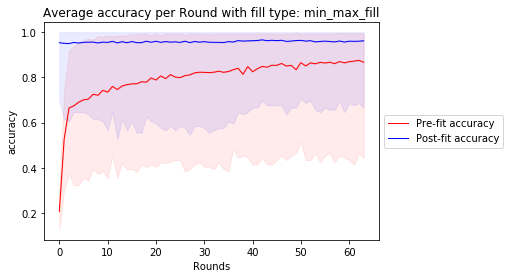

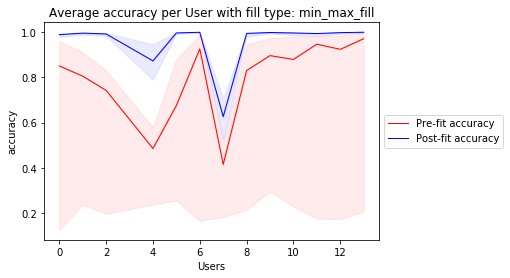

/home/kts1/anaconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/kts1/anaconda3/envs/env/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


Std deviation
For central


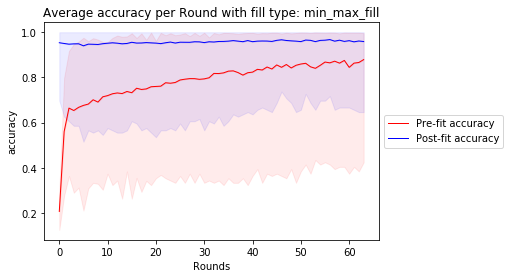

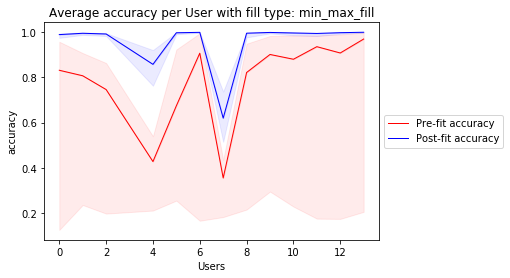

/home/kts1/anaconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


For p2p


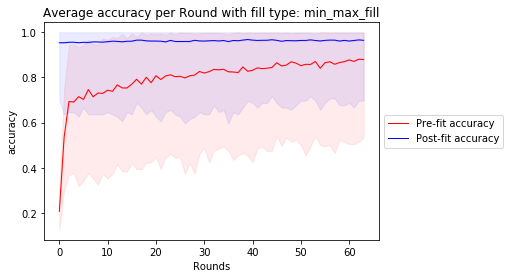

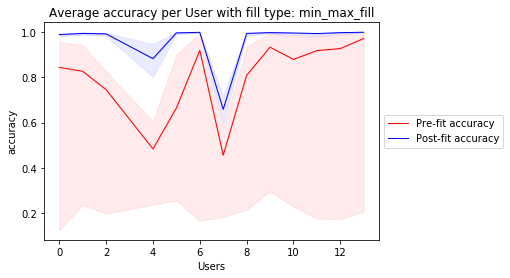

/home/kts1/anaconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Weighted average
For central


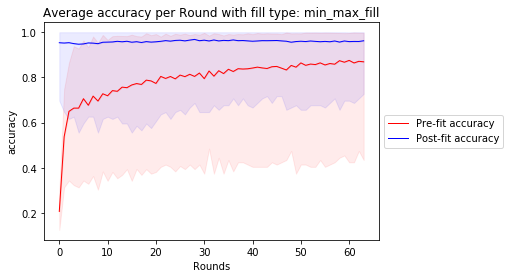

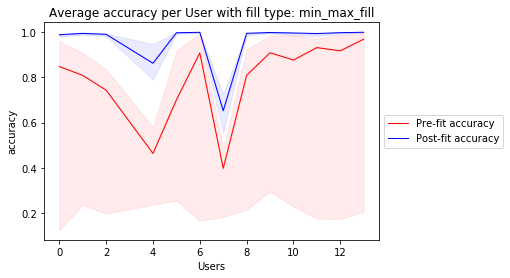

/home/kts1/anaconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


For p2p


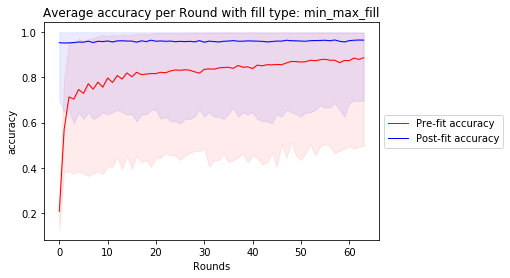

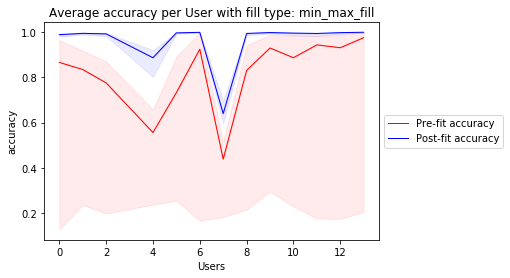

/home/kts1/anaconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Local training only


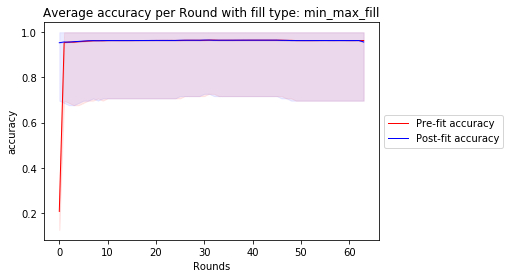

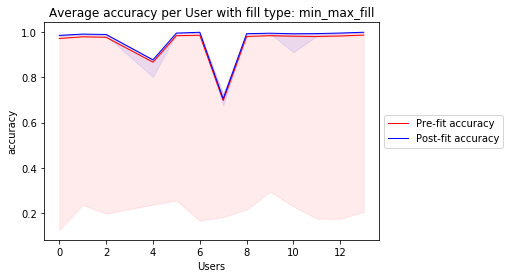

/home/kts1/anaconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:217: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


     Average   Maximum   Minimum Position Round  Standard Deviation  \
0   0.867336  0.994279  0.444444      Pre    63            0.169589   
1   0.962305  1.000000  0.666667     Post    63            0.090663   
2   0.878890  0.995995  0.424242      Pre    63            0.177145   
3   0.959017  1.000000  0.646465     Post    63            0.097781   
4   0.879471  0.998284  0.535354      Pre    63            0.145566   
5   0.964324  1.000000  0.696970     Post    63            0.083011   
6   0.869134  0.997712  0.434343      Pre    63            0.170923   
7   0.962367  1.000000  0.727273     Post    63            0.081136   
8   0.887145  0.997712  0.494949      Pre    63            0.149483   
9   0.965230  1.000000  0.696970     Post    63            0.082024   
10  0.963426  1.000000  0.696970      Pre    63            0.082666   
11  0.956952  1.000000  0.696970     Post    63            0.083212   

           Strategy  
0      centralround  
1      centralround  
2         

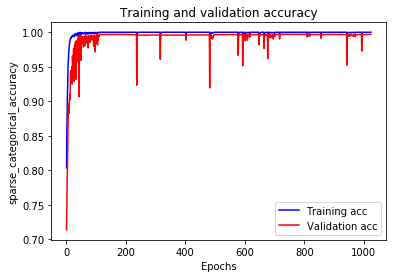

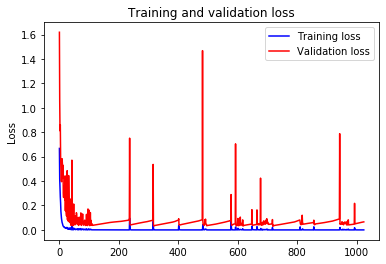

All
For central


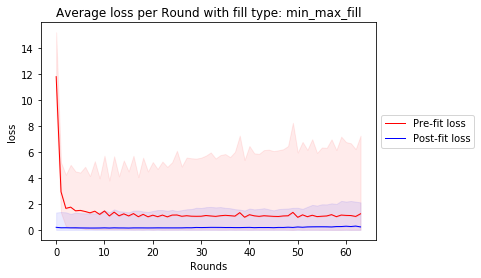

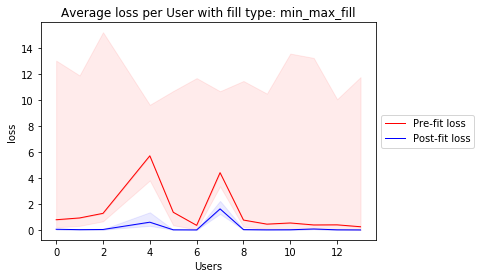

Std deviation
For central


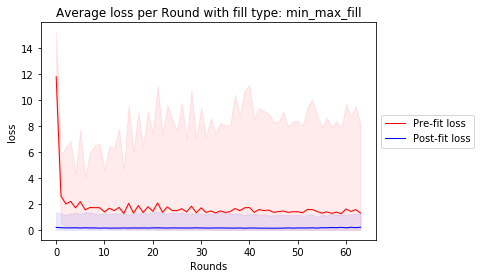

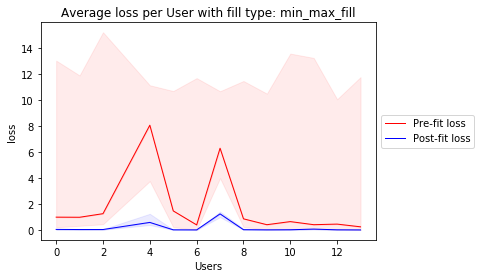

For p2p


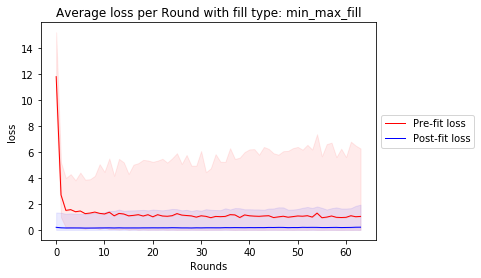

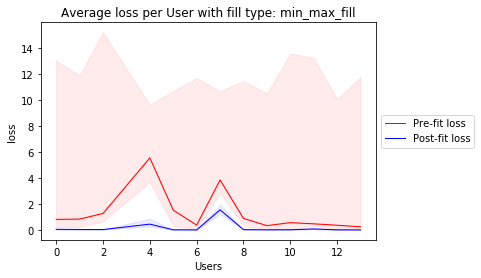

Weighted average
For central


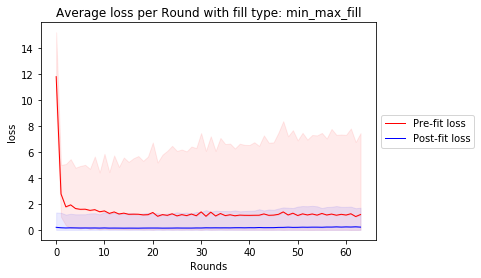

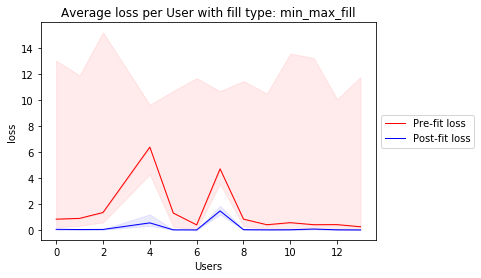

For p2p


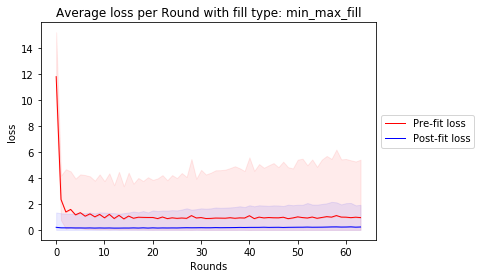

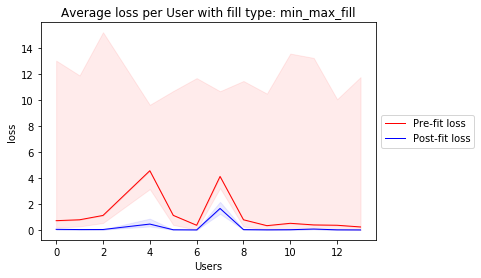

Local training only


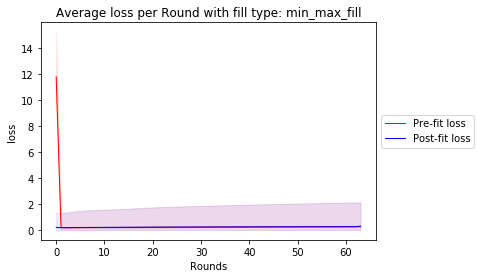

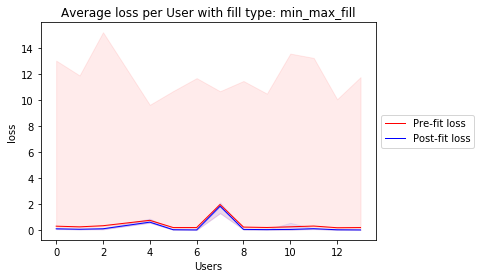

     Average   Maximum       Minimum Position Round  Standard Deviation  \
0   1.244056  7.262301  1.330757e-02      Pre    63            2.268327   
1   0.232707  2.120500  2.075950e-06     Post    63            0.570038   
2   1.303990  8.153041  1.295836e-02      Pre    63            2.649599   
3   0.209387  1.248513  8.365883e-04     Post    63            0.442292   
4   1.040773  6.276761  5.042958e-03      Pre    63            1.859758   
5   0.211187  1.944885  7.325847e-07     Post    63            0.520042   
6   1.187443  7.458721  7.875839e-03      Pre    63            2.236226   
7   0.217113  1.709324  1.143740e-06     Post    63            0.481664   
8   0.949749  5.411771  5.646333e-03      Pre    63            1.751031   
9   0.227178  1.929747  1.623703e-06     Post    63            0.528188   
10  0.251020  2.115149  1.929985e-08      Pre    63            0.560394   
11  0.290937  2.120689  2.380086e-08     Post    63            0.563412   

           Strategy  
0 

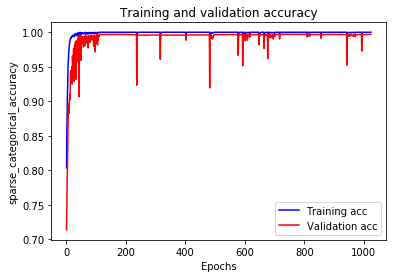

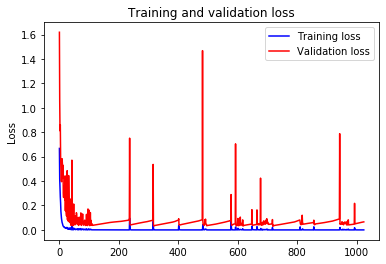

<Figure size 432x288 with 0 Axes>

In [5]:
# forces tensorfor to the a particular device to run things
# with tf.device(DEVICE):
#     averaging_methods = [Average.all]
#      # return a dictionary of users with data
print("Regular")
users_all, global_user = init_users(df = df, 
                                    averaging_methods = averaging_methods, 
                                    seed = SEED)
train_fed(users = users_all, rounds = ROUNDS,
          epochs = EPOCHS,
          strat = "central",
          train_user_verbose = False,
          train_user_verbose_evaluate = False,
          train_user_verbose_fit = False,
          averaging_method = Average.all,
          averaging_post = True,
          averaging_metric = "accuracy")
averaging_methods = [Average.std_dev]
# return a dictionary of users with data
print("avg - stddev")
users_std_dev, global_user = init_users(df = df, 
                                    averaging_methods = averaging_methods, 
                                    seed = SEED)
train_fed(users = users_std_dev, rounds = ROUNDS,
          epochs = EPOCHS,
          strat = "central",
          train_user_verbose = False,
          train_user_verbose_evaluate = False,
          train_user_verbose_fit = False,
          averaging_method =  Average.std_dev,
         averaging_post = True,
          averaging_metric = "accuracy")

# return a dictionary of users with data
users_std_dev_p2p, global_user = init_users(df = df, 
                                    averaging_methods = averaging_methods, 
                                    seed = SEED)
train_fed(users = users_std_dev_p2p, rounds = ROUNDS,
          epochs = EPOCHS,
          strat = "personalised",
          train_user_verbose = False,
          train_user_verbose_evaluate = False,
          train_user_verbose_fit = False,
          averaging_post = True,
          averaging_metric = "accuracy")
averaging_methods = [Average.weighted_avg]

# return a dictionary of users with data
print("weighted avg")
users_weighted_avg, global_user = init_users(df = df, 
                                    averaging_methods = averaging_methods, 
                                    seed = SEED)
train_fed(users = users_weighted_avg, rounds = ROUNDS,
          epochs = EPOCHS,
          strat = "central",
          train_user_verbose = False,
          train_user_verbose_evaluate = False,
          train_user_verbose_fit = False,
          averaging_method = Average.weighted_avg,
          averaging_post = True,
          averaging_metric = "accuracy")

# return a dictionary of users with data
users_weighted_avg_p2p, global_user = init_users(df = df, 
                                    averaging_methods = averaging_methods, 
                                    seed = SEED)
train_fed(users = users_weighted_avg_p2p, rounds = ROUNDS,
          epochs = EPOCHS,
          strat = "personalised",
          train_user_verbose = False,
          train_user_verbose_evaluate = False,
          train_user_verbose_fit = False,
          averaging_post = True,
          averaging_metric = "accuracy")
print("Local only")
users_local_only, global_user = init_users(df = df, 
                                    averaging_methods = averaging_methods, 
                                    seed = SEED)
train_fed(users = users_local_only, rounds = ROUNDS,
          epochs = EPOCHS,

          strat = "local_trainings_only",
          train_user_verbose = False,
          train_user_verbose_evaluate = False,
          train_user_verbose_fit = False,
          averaging_post = True,
          averaging_metric = "accuracy")

print("Global user training and validation")

global_user.train(epochs = EPOCHS*ROUNDS,
   verbose_fit = False,
   verbose_evaluate = False,
)
ignore_first_n = 0
final_values = False
MAJORITY_SPLIT="stdsplit"
for GRAPHING_METRIC in ["accuracy", "loss"]:
    round_summary_df = pd.DataFrame(columns=['Strategy','Position', 'Round', 'Average', 'Standard Deviation', 'Minimum', 'Maximum'])
    user_summary_df = pd.DataFrame(columns=['Strategy', 'Position', 'User', 'Average', 'Standard Deviation', 'Minimum', 'Maximum', 'Final Value'])
    print("All")

    print("For central")


    df_avg_round_stats_acc = avg_round_stats(users_all, 
                                             ignore_first_n = ignore_first_n, 
                                             min_max_fill = True, 
                                             metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"centralround-{MAJORITY_SPLIT}",
                                             final_values = final_values)
    df_avg_user_stats_acc = avg_user_stats(users_all, 
                                           ignore_first_n = ignore_first_n, 
                                           min_max_fill = True, 
                                           metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"centraluser-{MAJORITY_SPLIT}",
                                           final_values = final_values)
    last_2 = df_avg_round_stats_acc[-2:]
    last_2["Strategy"] = "centralround"
    round_summary_df = round_summary_df.append(last_2).reset_index(drop=True)
    df_avg_user_stats_acc["Strategy"] = "centraluser"
    user_summary_df = user_summary_df.append(df_avg_user_stats_acc).reset_index(drop=True)
    print("Std deviation")
    print("For central")


    df_avg_round_stats_acc = avg_round_stats(users_std_dev, 
                                             ignore_first_n = ignore_first_n, 
                                             min_max_fill = True, 
                                             metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"stdround-{MAJORITY_SPLIT}",
                                             final_values = final_values)
    df_avg_user_stats_acc = avg_user_stats(users_std_dev, 
                                           ignore_first_n = ignore_first_n, 
                                           min_max_fill = True, 
                                           metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"stduser-{MAJORITY_SPLIT}",
                                           final_values = final_values)
    last_2 = df_avg_round_stats_acc[-2:]
    last_2["Strategy"] = "stdround"
    round_summary_df = round_summary_df.append(last_2).reset_index(drop=True)
    df_avg_user_stats_acc["Strategy"] = "stduser"
    user_summary_df = user_summary_df.append(df_avg_user_stats_acc).reset_index(drop=True)

    print("For p2p")

    df_avg_round_stats_acc = avg_round_stats(users_std_dev_p2p, 
                                             ignore_first_n = ignore_first_n, 
                                             min_max_fill = True, 
                                             metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"stdround_p2p-{MAJORITY_SPLIT}",
                                             final_values = final_values)
    df_avg_user_stats_acc = avg_user_stats(users_std_dev_p2p, 
                                           ignore_first_n = ignore_first_n, 
                                           min_max_fill = True, 
                                           metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"stduser_p2p-{MAJORITY_SPLIT}",
                                           final_values = final_values)
    last_2 = df_avg_round_stats_acc[-2:]
    last_2["Strategy"] = "stdround_p2p"
    round_summary_df = round_summary_df.append(last_2).reset_index(drop=True)
    df_avg_user_stats_acc["Strategy"] = "stduser_p2p"
    user_summary_df = user_summary_df.append(df_avg_user_stats_acc).reset_index(drop=True)


    print("Weighted average")

    print("For central")


    df_avg_round_stats_acc = avg_round_stats(users_weighted_avg, 
                                             ignore_first_n = ignore_first_n, 
                                             min_max_fill = True, 
                                             metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"weightround-{MAJORITY_SPLIT}",
                                             final_values = final_values)
    df_avg_user_stats_acc = avg_user_stats(users_weighted_avg, 
                                           ignore_first_n = ignore_first_n, 
                                           min_max_fill = True, 
                                           metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"weightuser-{MAJORITY_SPLIT}",
                                           final_values = final_values)
    last_2 = df_avg_round_stats_acc[-2:]
    last_2["Strategy"] = "weightround"
    round_summary_df = round_summary_df.append(last_2).reset_index(drop=True)
    df_avg_user_stats_acc["Strategy"] = "weightuser"
    user_summary_df = user_summary_df.append(df_avg_user_stats_acc).reset_index(drop=True)

    print("For p2p")


    df_avg_round_stats_acc = avg_round_stats(users_weighted_avg_p2p, 
                                             ignore_first_n = ignore_first_n, 
                                             min_max_fill = True, 
                                             metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"weightround_p2p-{MAJORITY_SPLIT}",
                                             final_values = final_values)
    df_avg_user_stats_acc = avg_user_stats(users_weighted_avg_p2p, 
                                           ignore_first_n = ignore_first_n, 
                                           min_max_fill = True, 
                                           metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"weightuser_p2p-{MAJORITY_SPLIT}",
                                           final_values = final_values)

    last_2 = df_avg_round_stats_acc[-2:]
    last_2["Strategy"] = "weightround_p2p"
    round_summary_df = round_summary_df.append(last_2).reset_index(drop=True)
    df_avg_user_stats_acc["Strategy"] = "weightuser_p2p"
    user_summary_df = user_summary_df.append(df_avg_user_stats_acc).reset_index(drop=True)


    print("Local training only")


    df_avg_round_stats_acc = avg_round_stats(users_local_only, 
                                             ignore_first_n = ignore_first_n, 
                                             min_max_fill = True, 
                                             metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"localround-{MAJORITY_SPLIT}",
                                             final_values = final_values)
    df_avg_user_stats_acc = avg_user_stats(users_local_only, 
                                           ignore_first_n = ignore_first_n, 
                                           min_max_fill = True, 
                                           metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"localuser-{MAJORITY_SPLIT}",
                                           final_values = final_values)
    # draw_graphs(users_all_p2p[2])
    last_2 = df_avg_round_stats_acc[-2:]
    last_2["Strategy"] = "localround"
    round_summary_df = round_summary_df.append(last_2).reset_index(drop=True)
    df_avg_user_stats_acc["Strategy"] = "localuser"
    user_summary_df = user_summary_df.append(df_avg_user_stats_acc).reset_index(drop=True)

    print(round_summary_df)
    round_summary_df.to_csv(os.path.join(OUT_PATH,f'summary-rounds-{GRAPHING_METRIC}-{MAJORITY_SPLIT}.csv')) 
    user_summary_df.to_csv(os.path.join(OUT_PATH,f'summary-users-{GRAPHING_METRIC}-{MAJORITY_SPLIT}.csv')) 

    draw_graphs(global_user, path= OUT_PATH, save_as=f"global_{MAJORITY_SPLIT}")
    with open(os.path.join(OUT_PATH,f"{GRAPHING_METRIC}-{MAJORITY_SPLIT}.csv"), "w") as out:
        strats = [users_local_only, users_all, users_std_dev, users_std_dev_p2p, users_weighted_avg, users_weighted_avg_p2p]
        strats_names = ["Local only", "All (traditional)", "Std dev Central", "Std dev P2P", "Weighted avg Central", "Weighted avg P2P"]
        g_weights = global_user.get_weights()
        out.write("Testing user models (post fit) on global model aggregate data,\n")
        e = global_user.evaluate(verbose=False)
        out.write(f"{GRAPHING_METRIC}-globaluser,{e[0]},{e[1]},\n")
    #     print(global_user.evaluate(verbose=False))

        for i, strat in enumerate(strats):
    #         print(strats_names[i])
            out.write(strats_names[i]+",\n")
            for user in strat.values():
                global_user.set_weights(user.get_weights())
                e = global_user.evaluate(verbose=False)
                out.write(f"{GRAPHING_METRIC}-user-{user.get_id()}:,{e[0]},{e[1]},\n")
    #             print(f"{GRAPHING_METRIC}-{user.get_id()}: {e}")

In [6]:
#     ignore_first_n = 0
#     final_values = False
#     MAJORITY_SPLIT="stdsplit"
#     for GRAPHING_METRIC in ["accuracy", "loss"]:
#         round_summary_df = pd.DataFrame(columns=['Strategy','Position', 'Round', 'Average', 'Standard Deviation', 'Minimum', 'Maximum'])
#         user_summary_df = pd.DataFrame(columns=['Strategy', 'Position', 'User', 'Average', 'Standard Deviation', 'Minimum', 'Maximum', 'Final Value'])
#         print("All")

#         print("For central")


#         df_avg_round_stats_acc = avg_round_stats(users_all, 
#                                                  ignore_first_n = ignore_first_n, 
#                                                  min_max_fill = True, 
#                                                  metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"centralround-{MAJORITY_SPLIT}",
#                                                  final_values = final_values)
#         df_avg_user_stats_acc = avg_user_stats(users_all, 
#                                                ignore_first_n = ignore_first_n, 
#                                                min_max_fill = True, 
#                                                metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"centraluser-{MAJORITY_SPLIT}",
#                                                final_values = final_values)
#         last_2 = df_avg_round_stats_acc[-2:]
#         last_2["Strategy"] = "centralround"
#         round_summary_df = round_summary_df.append(last_2).reset_index(drop=True)
#         df_avg_user_stats_acc["Strategy"] = "centraluser"
#         user_summary_df = user_summary_df.append(df_avg_user_stats_acc).reset_index(drop=True)
#         print("Std deviation")
#         print("For central")


#         df_avg_round_stats_acc = avg_round_stats(users_std_dev, 
#                                                  ignore_first_n = ignore_first_n, 
#                                                  min_max_fill = True, 
#                                                  metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"stdround-{MAJORITY_SPLIT}",
#                                                  final_values = final_values)
#         df_avg_user_stats_acc = avg_user_stats(users_std_dev, 
#                                                ignore_first_n = ignore_first_n, 
#                                                min_max_fill = True, 
#                                                metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"stduser-{MAJORITY_SPLIT}",
#                                                final_values = final_values)
#         last_2 = df_avg_round_stats_acc[-2:]
#         last_2["Strategy"] = "stdround"
#         round_summary_df = round_summary_df.append(last_2).reset_index(drop=True)
#         df_avg_user_stats_acc["Strategy"] = "stduser"
#         user_summary_df = user_summary_df.append(df_avg_user_stats_acc).reset_index(drop=True)
        
#         print("For p2p")
        
#         df_avg_round_stats_acc = avg_round_stats(users_std_dev_p2p, 
#                                                  ignore_first_n = ignore_first_n, 
#                                                  min_max_fill = True, 
#                                                  metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"stdround_p2p-{MAJORITY_SPLIT}",
#                                                  final_values = final_values)
#         df_avg_user_stats_acc = avg_user_stats(users_std_dev_p2p, 
#                                                ignore_first_n = ignore_first_n, 
#                                                min_max_fill = True, 
#                                                metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"stduser_p2p-{MAJORITY_SPLIT}",
#                                                final_values = final_values)
#         last_2 = df_avg_round_stats_acc[-2:]
#         last_2["Strategy"] = "stdround_p2p"
#         round_summary_df = round_summary_df.append(last_2).reset_index(drop=True)
#         df_avg_user_stats_acc["Strategy"] = "stduser_p2p"
#         user_summary_df = user_summary_df.append(df_avg_user_stats_acc).reset_index(drop=True)


#         print("Weighted average")

#         print("For central")


#         df_avg_round_stats_acc = avg_round_stats(users_weighted_avg, 
#                                                  ignore_first_n = ignore_first_n, 
#                                                  min_max_fill = True, 
#                                                  metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"weightround-{MAJORITY_SPLIT}",
#                                                  final_values = final_values)
#         df_avg_user_stats_acc = avg_user_stats(users_weighted_avg, 
#                                                ignore_first_n = ignore_first_n, 
#                                                min_max_fill = True, 
#                                                metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"weightuser-{MAJORITY_SPLIT}",
#                                                final_values = final_values)
#         last_2 = df_avg_round_stats_acc[-2:]
#         last_2["Strategy"] = "weightround"
#         round_summary_df = round_summary_df.append(last_2).reset_index(drop=True)
#         df_avg_user_stats_acc["Strategy"] = "weightuser"
#         user_summary_df = user_summary_df.append(df_avg_user_stats_acc).reset_index(drop=True)

#         print("For p2p")


#         df_avg_round_stats_acc = avg_round_stats(users_weighted_avg_p2p, 
#                                                  ignore_first_n = ignore_first_n, 
#                                                  min_max_fill = True, 
#                                                  metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"weightround_p2p-{MAJORITY_SPLIT}",
#                                                  final_values = final_values)
#         df_avg_user_stats_acc = avg_user_stats(users_weighted_avg_p2p, 
#                                                ignore_first_n = ignore_first_n, 
#                                                min_max_fill = True, 
#                                                metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"weightuser_p2p-{MAJORITY_SPLIT}",
#                                                final_values = final_values)

#         last_2 = df_avg_round_stats_acc[-2:]
#         last_2["Strategy"] = "weightround_p2p"
#         round_summary_df = round_summary_df.append(last_2).reset_index(drop=True)
#         df_avg_user_stats_acc["Strategy"] = "weightuser_p2p"
#         user_summary_df = user_summary_df.append(df_avg_user_stats_acc).reset_index(drop=True)


#         print("Local training only")


#         df_avg_round_stats_acc = avg_round_stats(users_local_only, 
#                                                  ignore_first_n = ignore_first_n, 
#                                                  min_max_fill = True, 
#                                                  metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"localround-{MAJORITY_SPLIT}",
#                                                  final_values = final_values)
#         df_avg_user_stats_acc = avg_user_stats(users_local_only, 
#                                                ignore_first_n = ignore_first_n, 
#                                                min_max_fill = True, 
#                                                metric = GRAPHING_METRIC, path= OUT_PATH, save_as = f"localuser-{MAJORITY_SPLIT}",
#                                                final_values = final_values)
#         # draw_graphs(users_all_p2p[2])
#         last_2 = df_avg_round_stats_acc[-2:]
#         last_2["Strategy"] = "localround"
#         round_summary_df = round_summary_df.append(last_2).reset_index(drop=True)
#         df_avg_user_stats_acc["Strategy"] = "localuser"
#         user_summary_df = user_summary_df.append(df_avg_user_stats_acc).reset_index(drop=True)

#         print(round_summary_df)
#         round_summary_df.to_csv(os.path.join(OUT_PATH,f'summary-rounds-{GRAPHING_METRIC}-{MAJORITY_SPLIT}.csv')) 
#         user_summary_df.to_csv(os.path.join(OUT_PATH,f'summary-users-{GRAPHING_METRIC}-{MAJORITY_SPLIT}.csv')) 

#         draw_graphs(global_user, path= OUT_PATH, save_as=f"global_{MAJORITY_SPLIT}")
#         with open(os.path.join(OUT_PATH,f"{GRAPHING_METRIC}-{MAJORITY_SPLIT}.csv"), "w") as out:
#             strats = [users_local_only, users_all, users_std_dev, users_std_dev_p2p, users_weighted_avg, users_weighted_avg_p2p]
#             strats_names = ["Local only", "All (traditional)", "Std dev Central", "Std dev P2P", "Weighted avg Central", "Weighted avg P2P"]
#             g_weights = global_user.get_weights()
#             out.write("Testing user models (post fit) on global model aggregate data,\n")
#             e = global_user.evaluate(verbose=False)
#             out.write(f"{GRAPHING_METRIC}-globaluser,{e[0]},{e[1]},\n")
#         #     print(global_user.evaluate(verbose=False))

#             for i, strat in enumerate(strats):
#         #         print(strats_names[i])
#                 out.write(strats_names[i]+",\n")
#                 for user in strat.values():
#                     global_user.set_weights(user.get_weights())
#                     e = global_user.evaluate(verbose=False)
#                     out.write(f"{GRAPHING_METRIC}-user-{user.get_id()}:,{e[0]},{e[1]},\n")
#         #             print(f"{GRAPHING_METRIC}-{user.get_id()}: {e}")

In [7]:
model = users_weighted_avg[0].get_model()

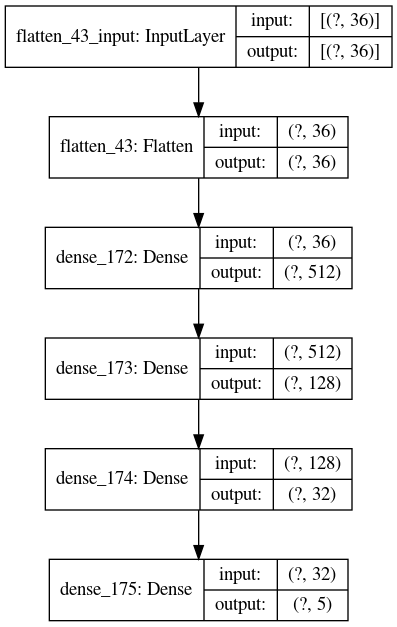

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [16]:
x=0
for i in users_all.keys():
    x+=users_all[i].get_latest_accuracy(post=False, pre=True)
print(x/13)
    #model.summary()

0.8673363305055178
